### Ok, So I have clusters, now what?

### Clusters are about providing options and insight

"You know you've done clustering right when your clusters make sense and are meaningful." - Maggie
"The difference betweena. goat rodeo and making clusters is using your clusters for deeper insight." -RO

### So what are our options?
* Step 1 is explore each cluster ot compare and contrast the data in each.
* Step 2 is to name yoru clusetrs if they ake sense, in English. "Manually" naming the clusters is powerful stuff and very common with segmentation, threat detection, and elsewhere in industry! Try to name them, if you can.

* Option 1: Use the clusters to simplify multiple other variables (dimensionality reduction)
* Option 2: Use cluster names as a target variable in order to classify incoming new data into the appropriate clusteer.
* Option 3: Perform deeper EDA and modeling for each cluster (assuming we have a target variable, but its relationship is different on each cluster, or the interplay of other features is different on each feature).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
# Acquire
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/cc276eea59e8295204d1f581c8da509f/raw/2388559aef7a0700eb31e7604351364b16e99653/mall_customers.csv', index_col="customer_id")
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


### Thoughts on data preparation

* If gender isn't a big impact on age, income, or spending score, we can drop that column.
* KMeans odes well with continuous values and not a bunch of one hot encoded columns for categories.
* If the populations of each gender are significantly different, we could encode the gender column to boolean or 0/1 values. But BEWARE about clustering on a bunch of boolean (0/1) values, since the curse of dimensionality sets in rapidly with each new non-continuous feature.
* I am choosing to leave outliers in the dataset to catch extremes in income/spending/age. (revisit later)

In [4]:
# Looks like the central tendencies and 

df.groupby('gender').agg(['min','mean','median','std','max'])

age                                  annual_income                    \
       min       mean median        std max           min       mean median   
gender                                                                        
Female  18  38.098214     35  12.644095  68            16  59.250000   60.0   
Male    18  39.806818     37  15.514812  70            15  62.227273   62.5   

                       spending_score                                  
              std  max            min       mean median       std max  
gender                                                                 
Female  26.011952  126              5  51.526786     50  24.11495  99  
Male    26.638373  137              1  48.511364     50  27.89677  97

In [5]:
# Based on the above insight
# If we had time and wanted to be more certain, we could run t-tests for independence between gender and each numeric column
df = df.drop(columns='gender')

In [6]:
train = df

In [9]:
scaler = MinMaxScaler()

scaler.fit(train)

train_scaled = scaler.transform(train)

train_scaled = pd.DataFrame(train_scaled, columns=train.columns, index=train.index)

In [10]:
train_scaled.head()

,age,annual_income,spending_score
customer_id,,,
1,0.019231,0.000000,0.387755
2,0.057692,0.000000,0.816327
3,0.038462,0.008197,0.051020
4,0.096154,0.008197,0.775510
5,0.250000,0.016393,0.397959


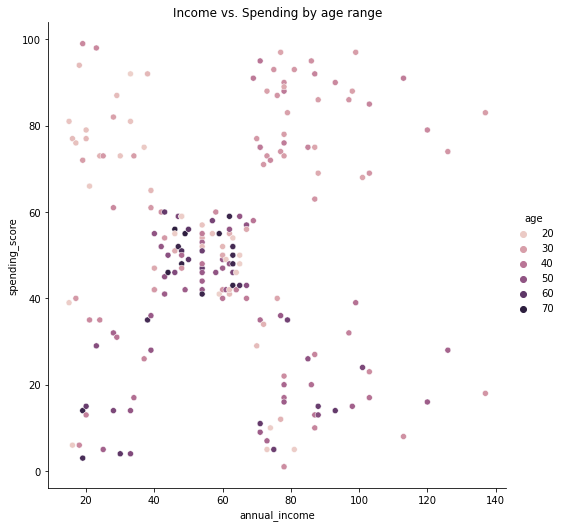

In [11]:
# We can plot a numeric x variable, a numeric y variable,
# Here, we'll look at income vs. spending score broken out by gender with a hue for ages
sns.relplot(data=train, x='annual_income', y='spending_score', hue='age', height=7, aspect=1).set(title='Income vs. Spending by age range')